# Explicación de los retornos de un activo en función de otros datos

En este caso vamos a aprender cómo podemos estudiar algunos activos financieros en función del comportamiento de otros activos financieros u otros indicadores que se comportan como tales (factores), aunque no sean activos financieros reales.

In [88]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


## Regresión lineal

Consiste en encontrar la recta $y=ax+b$ que mejor se adapta a nuestros datos, es decir, que minimiza el error cuadrático medio, que se define como:

$$MSE=\frac{\sum_{i=1}^{N}(y_i-\hat y_i)^2}{N}$$

A modo de ejemplo, creamos unos datos sintéticos mediante una recta conocida $y=2x+1$.

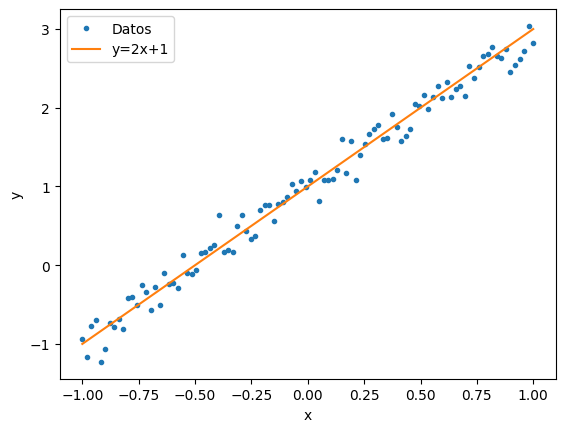

In [89]:
# Creamos datos de ejemplo siguiendo la recta y=2x+1 y añadiendo un poco de ruido aleatorio con distribución normal.

# Generador de números aleatorios.
rng = np.random.default_rng(42)

# x = array de 100 elementos uniformemente distribuidos entre -1 y 1.
x = np.linspace(-1, 1, 100)

# e = array de 100 elementos con ruido aleatorio con distribución normal.
e = rng.normal(loc=0, scale=0.2, size=100)

# y = 2 * (array de 100) + 1 + (array de 100).
y = 2 * x + 1 + e

# Graficamos los datos (x, y) junto con la recta de la que parten.
plt.plot(x, y, ".", label="Datos")
plt.plot(x, 2 * x + 1, label="y=2x+1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Ahora que ya tenemos nuestros datos $y$ vamos a ejecutar una regresión lineal con el objetivo de encontrar la recta $y=ax+b$ que mejor los explica. Para ello podemos hacer uso de la librería ``statsmodel`` de Python.

Ref.:
* StatsModels: https://www.statsmodels.org/stable/index.html

In [90]:
import statsmodels.api as sm

# Variable independiente.
X = sm.add_constant(x)
# Modelo de regresión lineal.
# y -> variable dependiente.
model = sm.OLS(y, X)
# Ajustamos el modelo de regresión lineal.
resultado = model.fit()
# Mostramos los resultados.
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5486.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           7.54e-88
Time:                        13:26:07   Log-Likelihood:                 46.094
No. Observations:                 100   AIC:                            -88.19
Df Residuals:                      98   BIC:                            -82.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9899      0.015     64.216      0.0

Análisis de resultados.

<img src="../imgs/Tema 2 - Caso 5 - OLS.png">

* $R^2=0.982$ lo que significa que el modelo explica el 98.2% de la variabilidad de los datos. Esto significa que el modelo se ajusta bien a los datos.
* $const=0.9899$: la constante utilizada para generar los datos fue $b=1$ y la estimación es $0.9899$.
    * Es estadísticamente relevante porque $P>|t|<0.05$ (se usa normalmente el valor 0.05, aunque puedes ser más exigente).
    * En el rango de valores no se encuentra el 0.
    * Podemos descartar la hipótesis nula.
* $x1=1.9580$: la pendiente utilizada para generar los datos fue $a=2$ y la estimación es $1.9580$.
    * Es estadísticamente relevante porque $P>|t|<0.05$.
    * En el rango de valores no se encuentra el 0.
    * Podemos descartar la hipótesis nula.

Las diferencias en la estimación de la constante (intercepto) y la pendiente (coeficiente) se deben al error aleatorio introducido al generar los datos sintéticos.

In [91]:
alpha = resultado.params[0]
beta = resultado.params[1]
r2 = resultado.rsquared

print(f"alpha = {alpha}")
print(f"beta = {beta}")
print(F"R2 = {r2}")

alpha = 0.9899460777032287
beta = 1.9580471632962757
R2 = 0.9824508687604641


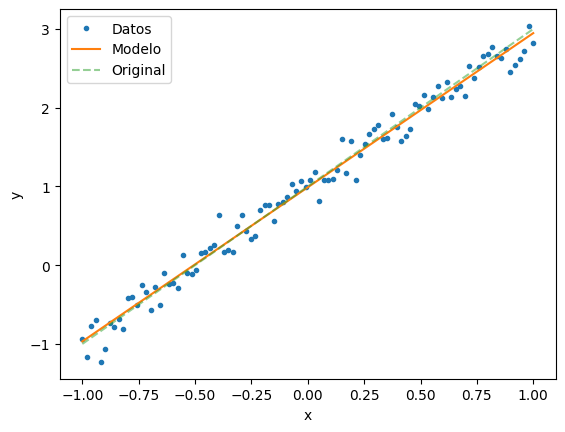

In [92]:
# Graficamos los datos junto con las rectas.
plt.plot(x, y, ".", label="Datos")
plt.plot(x, beta * x + alpha, label="Modelo")
plt.plot(x, 2 * x + 1, label="Original", linestyle="--", alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

La recta generadora no es exactamente igual a la recta obtenida mediante la regresión lineal ¿significa eso que se ha estimado mal? ¿la recta calculada mediante regresión se ajusta mejor a los datos que la recta generadora? Vamos a calcular el Error Cuadrático Medio (MSE) de ambas rectas:

$$MSE=\frac{\sum_{i=1}^{N}(y_i-\hat y_i)^2}{N}$$

In [93]:
y_datos = y
y_generadora = 2 * x + 1
y_regresion = beta * x + alpha

mse_generadora = np.mean((y_datos - y_generadora) ** 2)
mse_regresion = np.mean((y_datos - y_regresion) ** 2)

print(f"MSE generadora = {mse_generadora}")
print(f"MSE regresión = {mse_regresion}")
print(f"Diferencia = {mse_generadora - mse_regresion}")

MSE generadora = 0.023988890416851313
MSE regresión = 0.023289276769509114
Diferencia = 0.0006996136473421989


En resumen ¿qué hemos hecho?

Teníamos unos datos $(x,y)$ distribuidos de cierta manera en un espacio bidimensional, y hemos encontrado otros datos $(x, \hat{y})$ definidos por la recta $f(x)=\hat{y}=\beta x + \alpha$ que explican un 98.2% de la variabilidad de los datos originales.

Supongamos ahora que tenemos los datos $(x,y)$ y los datos $(x, \hat{y})$, pero no conocemos $f(x)$, es decir, no conocemos la función que genera $\hat{y}$ ¿Podemos saber qué tan bien explican $(x, \hat{y})$ (variable independiente $X$) a $(x,y)$ (variable dependiente $y$)?

* $X=(x, \hat{y})$
* $y=(x,y)$

En otras palabras, cuando yo observo $X$ ¿es buena predictora de $y$?

In [94]:
# Construimos un DataFrame a partir de x, y_datos, y_regresion
df = pd.DataFrame({"x":x, "y": y_datos, "X": y_regresion})
df.set_index("x", inplace=True)
df

,y,X
x,,
-1.000000,-0.939057,-0.968101
-0.979798,-1.167593,-0.928545
-0.959596,-0.769102,-0.888988
-0.939394,-0.690675,-0.849432
-0.919192,-1.228591,-0.809875
...,...,...
0.919192,2.548961,2.789767
0.939394,2.614248,2.829324
0.959596,2.719743,2.868880


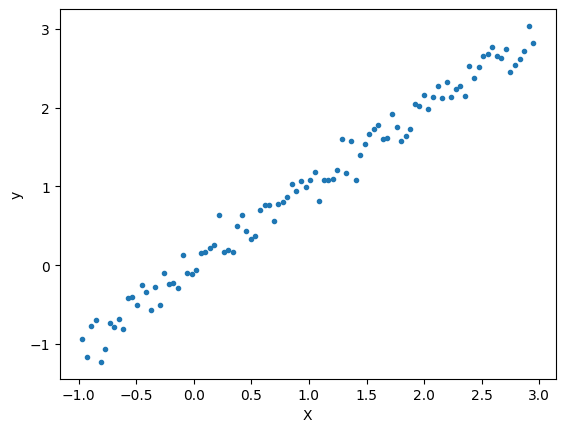

In [95]:
# Graficamos los datos (X, y).
plt.scatter(df["X"].values, df["y"].values, marker=".")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [96]:
# Ejecutamos la regresión.
import statsmodels.api as sm

# Variable independiente.
X = sm.add_constant(df["X"].values)
# Modelo de regresión lineal.
# y -> variable dependiente.
model = sm.OLS(df["y"].values, X)
# Ajustamos el modelo de regresión lineal.
resultado = model.fit()
# Mostramos los resultados.
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     5486.
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           7.54e-88
Time:                        13:26:08   Log-Likelihood:                 46.094
No. Observations:                 100   AIC:                            -88.19
Df Residuals:                      98   BIC:                            -82.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.296e-16      0.020  -1.62e-14      1.0

Análisis de los resultados:

1. Resumen del Modelo
- **Dep. Variable**: La variable dependiente es `y`.
- **R-squared**: El valor de $R^2$ es 0.982, lo que indica que el 98.2% de la variabilidad en `y` puede ser explicada por `X`. Esto sugiere un ajuste muy bueno del modelo.
- **F-statistic**: El valor de la estadística F es 5486, con una probabilidad asociada (Prob (F-statistic)) de 7.54e-88, indicando que el modelo es altamente significativo.

2. Coeficientes
- **const**: El coeficiente de la constante es aproximadamente -3.296e-16, con un valor p de 1.000. Esto sugiere que la constante no es significativamente diferente de cero.
- **X**: El coeficiente de `X` es 1.0000, con un error estándar de 0.014 y un valor p es 0.000, lo que indica que `X` es altamente significativo. El intervalo de confianza del 95% para `X` es [0.973, 1.027], lo que sugiere que el coeficiente es muy cercano a 1.

En resumen, el modelo de regresión lineal parece ser significativo, con `X` explicando casi toda la variabilidad en `y`.

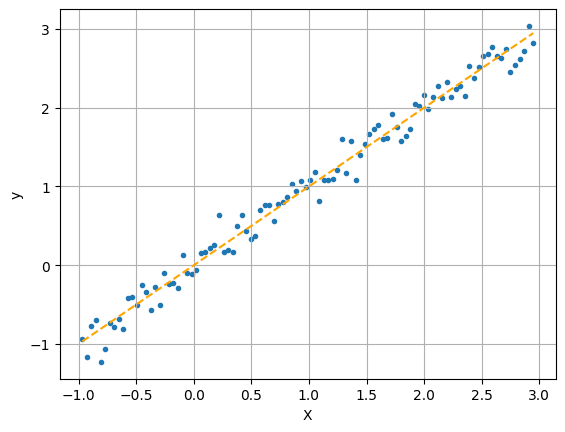

In [97]:
alpha = resultado.params[0]
beta = resultado.params[1]

# Graficamos los datos (X, y).
plt.scatter(df["X"], df["y"], marker=".")
plt.plot(df["X"], beta * df["X"] + alpha, label="Modelo", color="orange", linestyle="--")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

Ahora vamos a hacer una ligera modificación a nuestro DataFrame.

In [98]:
# Sustituir el índice numérico por un índice de fechas.
df.set_index(pd.date_range("2021-01-01", periods=100), inplace=True)

# Sustituir los nombres de las columnas ["y", "X"] por ["Activo", "Factor"].
df.columns = ["Activo", "Factor"]

df

,Activo,Factor
2021-01-01,-0.939057,-0.968101
2021-01-02,-1.167593,-0.928545
2021-01-03,-0.769102,-0.888988
2021-01-04,-0.690675,-0.849432
2021-01-05,-1.228591,-0.809875
...,...,...
2021-04-06,2.548961,2.789767
2021-04-07,2.614248,2.829324
2021-04-08,2.719743,2.868880
2021-04-09,3.039551,2.908437


Si este fuese nuestro caso, podríamos decir que **el "Factor" explica un 98.2% del comportamiento de nuestro "Activo"**.

## Análisis de empresas utilizando los Factores de Fama & French

* APPLE (AAPL): big-cap, Teléfonos y dispositivos de mano
* MICROSOFT (MSFT): big-cap, Software
* CENTURY ALUMINUM COMPANY (CENX): small-cap, Aluminio
* BIG 5 (BGFV): small-cap, Otros minoristas especializados (artículos deportivos)

In [99]:
# Descargamos los datos de Yahoo Finance.
data = yf.download(
    ["AAPL", "MSFT", "CENX", "BGFV"], start="2018-12-31", end="2024-06-08"
)
# Nos quedamos con el precio de cierre ajustado.
data = data.loc[:, "Adj Close"]

data.shape

[*********************100%%**********************]  4 of 4 completed


(1369, 4)

Lectura de factores de Fama & French

In [100]:
# Cargamos los 3 factores de Fama & French.
ff_3_factors = pd.read_csv(
    "../data/F-F_Research_Data_Factors_daily.CSV", index_col="Date", parse_dates=["Date"]
)
# Nos quedamos solamente con los factores (quitamos "RF") en el período temporal de los precios de los activos.
ff_3_factors = ff_3_factors.loc[
    data.index.min() : data.index.max(), ["Mkt-RF", "SMB", "HML"]
]
# Igualamos el índice con el DF de precios y rellenamos hacia adelante.
ff_3_factors.reindex(index=data.index, method="ffill")

ff_3_factors.shape

(1369, 3)

In [101]:
# Cargamos los factores de las 49 industrias de Fama & French.
ff_industry_factors = pd.read_csv(
    "../data/49_Industry_Portfolios_Daily.CSV", index_col="Date", parse_dates=["Date"]
)
# Nos quedamos solamente con los factores en el período temporal de los activos.
ff_industry_factors = ff_industry_factors.loc[
    data.index.min() : data.index.max(), :
]
# Igualamos el índice con el DF de precios y rellenamos hacia adelante.
ff_industry_factors.reindex(index=data.index, method="ffill")

ff_industry_factors.shape

(1369, 49)

Cálculo de los retornos

In [105]:
ret_data = np.log(data).diff().dropna()

ret_data.shape

(1368, 4)

Ejecutamos las regresiones con los factores

In [106]:
# Ejecutamos la regresión.
import statsmodels.api as sm

# Variable independiente.
X = sm.add_constant(ff_3_factors.iloc[1:])
# Variable dependiente.
y = ret_data.loc[:, ["AAPL"]]

# Modelo de regresión lineal.
# y -> variable dependiente.
model = sm.OLS(y, X)
# Ajustamos el modelo de regresión lineal.
resultado = model.fit()

# Mostramos los resultados.
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     972.0
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        13:30:02   Log-Likelihood:                 4202.0
No. Observations:                1368   AIC:                            -8396.
Df Residuals:                    1364   BIC:                            -8375.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.407      0.1

In [108]:
# Ejecutamos la regresión.
import statsmodels.api as sm

# Variable independiente.
X = sm.add_constant(ff_industry_factors.iloc[1:])
# Variable dependiente.
y = ret_data.loc[:, ["BGFV"]]

# Modelo de regresión lineal.
# y -> variable dependiente.
model = sm.OLS(y, X)
# Ajustamos el modelo de regresión lineal.
resultado = model.fit()

# Mostramos los resultados.
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                   BGFV   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     8.884
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           3.01e-53
Time:                        13:38:33   Log-Likelihood:                 2264.4
No. Observations:                1368   AIC:                            -4429.
Df Residuals:                    1318   BIC:                            -4168.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.155      0.8